# Aula 1 - Rede Neural Artificial sem pacotes

### Classe que permite a criação da rede

Nesta aula, vamos explorar o funcionamento básico de uma Rede Neural Artificial (RNA) implementando uma do zero, sem utilizar pacotes prontos como TensorFlow ou PyTorch. Isso permitirá que você entenda o que acontece internamente em uma rede neural e os cálculos que ela realiza para ajustar pesos e gerar previsões.

Pacotes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Parte 1 - Parâmetros básicos

Definimos um valor de seed (np.random.seed(0)) para garantir a reprodutibilidade dos resultados. Isso assegura que o processo de inicialização de pesos e a divisão de dados ocorra da mesma forma a cada execução, essencial para depuração e análise de desempenho.

In [4]:
# Garante que os resultados sejam reproduzíveis. Trata-se do valor utilizado para iniciar operações randômicas.
np.random.seed(0)

# Parte 2 - Preparação dos Dados

Carregamos os dados e realizamos algumas operações para preparar o conjunto de entrada e saída da rede neural:

**Carregamento do Dataset**: Utilizamos pd.read_csv("winequality-red.csv") para ler o arquivo CSV de dados. É importante garantir que o arquivo esteja formatado corretamente para evitar problemas de leitura e análise.

**Definição de Entradas e Saídas (X e Y)**: Definimos x como as primeiras 11 colunas, que contêm as variáveis preditoras, e y como a coluna de destino (qualidade do vinho).

**Normalização**: Aplicamos normalização min-max a cada coluna do conjunto de dados de entrada x, convertendo os valores para a faixa entre 0 e 1. Isso facilita o aprendizado da rede, evitando que valores muito altos dominem as operações de peso.

**Divisão do Dataset**: Dividimos o conjunto de dados em x_train, x_test, y_train e y_test usando train_test_split, com 20% dos dados reservados para teste.

In [5]:
# Lê nossos dados de vinho
data = pd.read_csv("winequality-red.csv")

# X e Y
x = data.iloc[:, 0:11]
y = data.iloc[:, 11]


# Função para normalização min-max
def min_max_normalization(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column


# Normalizar todas as colunas do DataFrame
x = x.apply(min_max_normalization)

y = min_max_normalization(y)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


Definimos os tamanhos das camadas da rede:

**input_size**: Define o número de neurônios na camada de entrada, igual ao número de colunas em x_train.

**hidden_size**: Número de neurônios na camada oculta, determinado aqui como 4. Isso pode ser ajustado dependendo da complexidade do modelo e dos dados.

**output_size**: Número de neurônios na camada de saída, que é 1, pois estamos tentando prever a qualidade do vinho.

In [6]:
# Parâmetros da rede neural
input_size = x_train.shape[1]
hidden_size = 4
output_size = 1

In [7]:
input_size

11

# Parte 3 - Inicializa Parâmetros randomicamente

Nesta etapa, inicializamos os pesos da rede neural aleatoriamente:

Função **initialize_parameters**: Define os pesos da camada de entrada para a camada oculta (weights_input_hidden) e da camada oculta para a camada de saída (weights_hidden_output). Pesos aleatórios ajudam a evitar simetrias e facilitam a convergência.

In [8]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

In [9]:
weights_input_hidden, weights_hidden_output =  initialize_parameters(input_size, hidden_size, output_size)

# Parte 4 - Função Sigmoide

A função sigmoide é aplicada para transformar as saídas dos neurônios:

**sigmoid**: Função de ativação que aplica uma transformação para produzir uma saída entre 0 e 1.

**sigmoid_derivative**: Função derivada da sigmoide, usada durante o cálculo da retropropagação para ajustar os pesos.

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Parte 5 - Forward Propagation

Realizamos a propagação direta para calcular as previsões da rede neural:

Função **forward_pass**: Multiplicamos a entrada pela matriz de pesos de entrada para camada oculta e aplicamos a função de ativação sigmoide. A saída é então multiplicada pela matriz de pesos da camada oculta para a saída, resultando na previsão final.

Essa etapa gera o output, a previsão da rede para cada exemplo de treinamento.

In [11]:
def forward_pass(inputs, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output = sigmoid(output_layer_input)

    return output, hidden_layer_output

In [12]:
output, hidden_output = forward_pass(x_train,weights_input_hidden, weights_hidden_output)

# Parte 6 - Backpropagation

Nesta etapa, ajustamos os pesos com base no erro da previsão:

**Erro de Saída**: Calculado como a diferença entre a previsão (output) e o valor real (targets).

**Gradientes**: Calculamos os gradientes para ajustar os pesos usando as derivadas da função de ativação. output_delta ajusta a camada de saída, enquanto hidden_delta ajusta a camada oculta.

**Atualização dos Pesos**: Calculamos os gradientes para os pesos entre as camadas de entrada e oculta, e entre as camadas oculta e de saída. Esses gradientes são ajustados de acordo com a taxa de aprendizado (learning_rate).

In [13]:
def backward_pass(inputs, targets, output, hidden_output, weights_input_hidden, weights_hidden_output,
                  learning_rate):
    output_error = targets - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    weights_input_hidden_grad = np.dot(inputs.T, hidden_delta) * learning_rate
    weights_hidden_output_grad = np.dot(hidden_output.T, output_delta) * learning_rate

    return weights_input_hidden_grad, weights_hidden_output_grad


In [14]:
y_train.shape



(1279,)

In [15]:
# Nova rede
learning_rate = 0.01

weights_input_hidden_grad, weights_hidden_output_grad =  backward_pass(x_train, y_train.to_numpy().reshape(-1, 1), output, hidden_output, weights_input_hidden, weights_hidden_output,learning_rate)

In [16]:
weights_input_hidden_grad

array([[-0.01355822, -0.01890645, -0.05582903,  0.01543676],
       [-0.0098772 , -0.01219036, -0.0372528 ,  0.01349915],
       [-0.01230602, -0.01665081, -0.04911258,  0.0123021 ],
       [-0.00455585, -0.00601904, -0.01786188,  0.00562977],
       [-0.00469891, -0.00628142, -0.01871869,  0.00629653],
       [-0.00944996, -0.01041949, -0.03173739,  0.01168193],
       [-0.00545352, -0.00658387, -0.02021572,  0.0075366 ],
       [-0.01885934, -0.02553933, -0.07570145,  0.02398096],
       [-0.01910817, -0.02141004, -0.06646448,  0.0229312 ],
       [-0.00903952, -0.01131357, -0.0343927 ,  0.01080971],
       [-0.01600269, -0.01711152, -0.05407832,  0.01563747]])

In [17]:
weights_input_hidden

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877,  0.15494743,  0.37816252],
       [-0.88778575, -1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 ]])

# Parte 7 - Treina Modelo

Usamos o processo de propagação direta e retropropagação repetidamente para treinar a rede neural:

**Função train_neural_network**: Realiza a propagação direta e a retropropagação em cada época. Calculamos a perda e a acurácia em cada época, permitindo observar o desempenho ao longo do tempo.

**Epochs e Aprendizado**: Definimos o número de épocas (iterações) e a taxa de aprendizado. No treinamento, os pesos são atualizados em cada época, reduzindo o erro.

**Visualização de Perda**: Armazenamos e imprimimos a perda em épocas específicas para acompanhar a performance.

In [18]:

def train_neural_network(x_train, y_train, input_size, hidden_size, output_size, epochs, learning_rate):
    weights_input_hidden, weights_hidden_output = initialize_parameters(input_size, hidden_size, output_size)

    # Listas para armazenar a perda e a acurácia em cada época
    losses = []

    for epoch in range(epochs):
        output, hidden_output = forward_pass(x_train, weights_input_hidden, weights_hidden_output)
        weights_input_hidden_grad, weights_hidden_output_grad = \
            backward_pass(x_train, y_train, output, hidden_output, weights_input_hidden,
                          weights_hidden_output, learning_rate)

        # Atualização dos pesos
        weights_input_hidden += weights_input_hidden_grad
        weights_hidden_output += weights_hidden_output_grad

        # Calcular e armazenar a perda e a acurácia em cada época
        loss = np.mean(np.square(y_train - output))
        losses.append(loss)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")

    return losses, output

In [19]:
 # Treinamento da rede neural
epochs = 10000
losses, accuracies = train_neural_network(x_train, y_train.to_numpy().reshape(-1, 1), input_size, hidden_size, output_size, epochs, learning_rate)

Epoch 0: Loss = 0.05473279302709547
Epoch 1000: Loss = 0.016987335175531224
Epoch 2000: Loss = 0.016783818362044067
Epoch 3000: Loss = 0.016552965802726173
Epoch 4000: Loss = 0.016276948498423913
Epoch 5000: Loss = 0.016028449785255652
Epoch 6000: Loss = 0.015847326781924676
Epoch 7000: Loss = 0.015736949893686954
Epoch 8000: Loss = 0.015675356427184376
Epoch 9000: Loss = 0.01564003564355994


# Parte 9 - Gera Previsão

Após o treinamento, visualizamos a perda e a acurácia da rede:

**Gráfico de Desempenho**: Plotamos a perda ao longo do tempo para visualizar o ajuste da rede aos dados de treinamento e avaliar se o modelo está convergindo ou sofrendo overfitting.

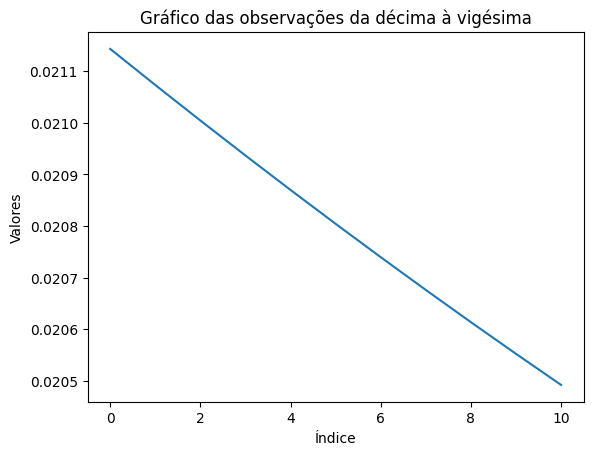

In [20]:
# Plotar a evolução da perda e da acurácia ao longo das épocas
import matplotlib.pyplot as plt

dados_plotar = losses[9:20]

# Criando o gráfico
plt.plot(dados_plotar)
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfico das observações da décima à vigésima')
plt.show()
